# Análise Exploratória de Dados - Risco de Crédito

Este notebook realiza a análise inicial dos dados, incluindo tratamento de valores ausentes, visualizações e preparação inicial para modelagem.

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
inadimplente    0
dtype: int64
(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIMIT_BAL     30000 non-null  float64
 2   SEX           30000 non-null  int64  
 3   EDUCATION     30000 non-null  int64  
 4   MARRIAGE      30000 non-null  int64  
 5   AGE           30000 non-null  int64  
 6   PAY_0         30000 non-null  int64  
 7   PAY_2         30000 non-

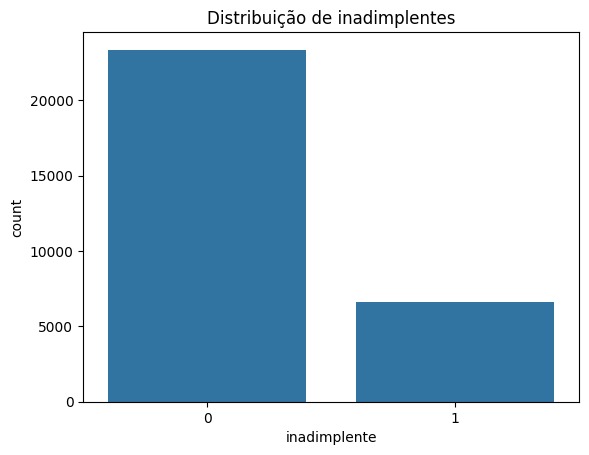

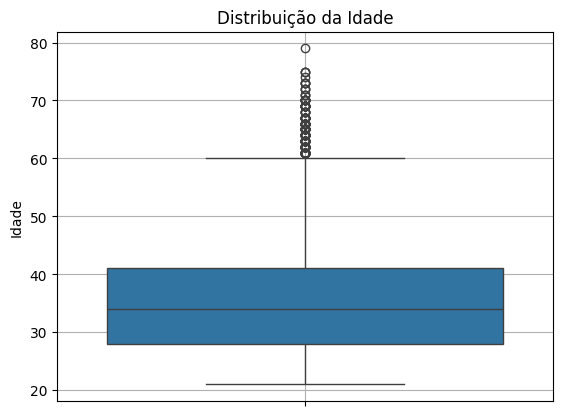

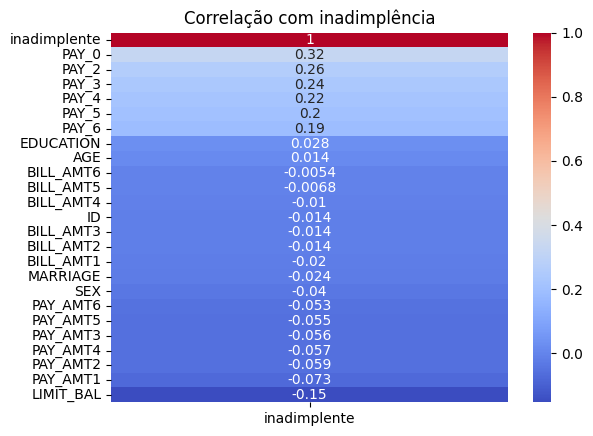

===== Regressão Logística =====
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



<Figure size 800x600 with 0 Axes>

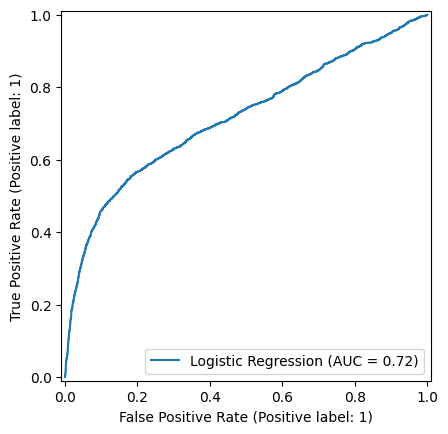

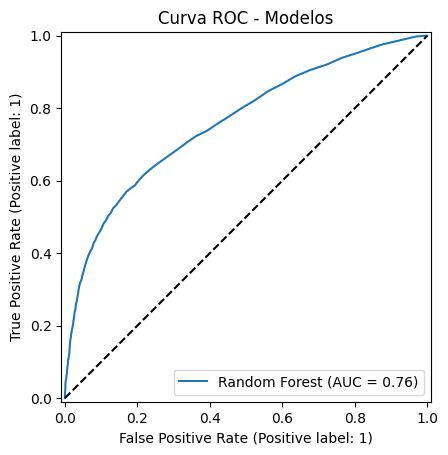

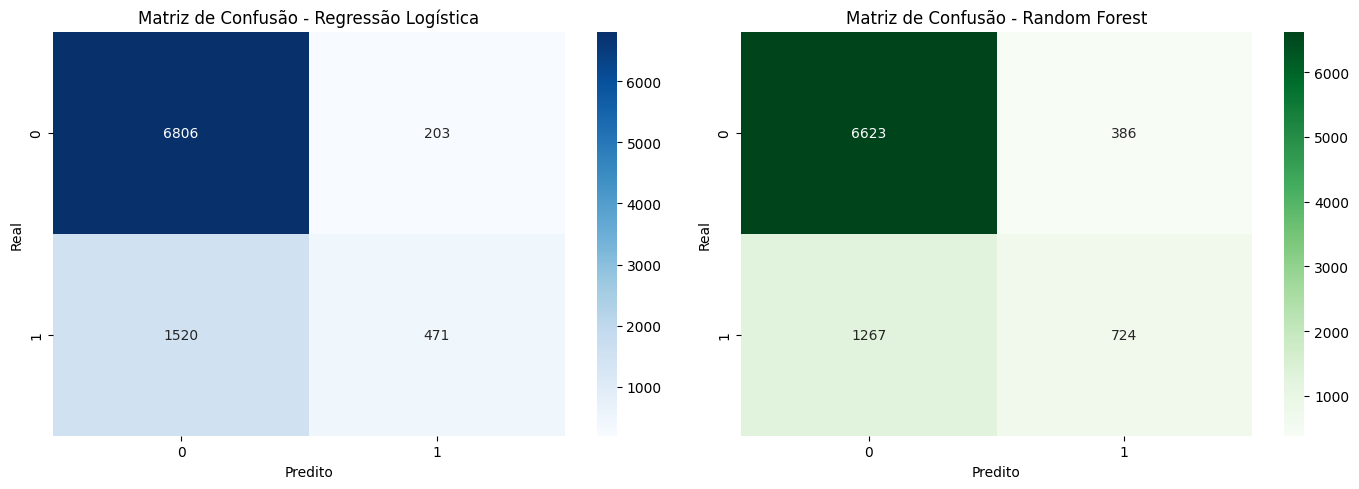

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Centralização dos nomes de arquivos
ARQUIVOS = {
    "dados_original": "../dados/UCI_Credit_Card.csv",
    "dados_tratados": "../dados/dados_credito_tratados.csv",
    
    "vis_inadimplentes": "../resultados/visualizacoes/distribuicao_inadimplentes.png",
    "vis_idade": "../resultados/visualizacoes/distribuicao_idade.png",
    "vis_correlacao": "../resultados/visualizacoes/correlacao_inadimplencia.png",
    
    "roc_modelos": "../resultados/modelos/curva_roc_modelos.png",
    "matrizes_confusao": "../resultados/modelos/matrizes_confusao.png",
    
    "modelo_logreg": "../resultados/modelos/modelo_logreg.pkl",
    "modelo_rf": "../resultados/modelos/modelo_rf.pkl"
}

# Garantir diretórios
os.makedirs('../dados', exist_ok=True)
os.makedirs('../resultados/visualizacoes', exist_ok=True)
os.makedirs('../resultados/modelos', exist_ok=True)

# Leitura dos dados
dados = pd.read_csv(ARQUIVOS["dados_original"])
dados.rename(columns={'default.payment.next.month': 'inadimplente'}, inplace=True)

# Verificação e descrição inicial
print(dados.isnull().sum())
print(dados.shape)
dados.info()
print(dados.describe())

# Visualização: Distribuição da variável alvo
sns.countplot(x='inadimplente', data=dados)
plt.title('Distribuição de inadimplentes')
plt.savefig(ARQUIVOS["vis_inadimplentes"])
plt.show()

# Visualização: Boxplot da idade
sns.boxplot(y=dados['AGE'])
plt.title('Distribuição da Idade')
plt.ylabel('Idade')
plt.grid(True)
plt.savefig(ARQUIVOS["vis_idade"])
plt.show()

# Visualização: Correlação com a variável alvo
dados['inadimplente'] = dados['inadimplente'].astype(int)
corr = dados.corr(numeric_only=True)
sns.heatmap(corr[['inadimplente']].sort_values(by='inadimplente', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação com inadimplência')
plt.savefig(ARQUIVOS["vis_correlacao"])
plt.show()

# Salvando dados tratados
dados.to_csv(ARQUIVOS["dados_tratados"], index=False)

# ========================
# MODELAGEM PREDITIVA
# ========================

# Recarregar dados tratados
dados = pd.read_csv(ARQUIVOS["dados_tratados"])
X = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

# Padronização das variáveis numéricas
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[colunas_numericas] = scaler.fit_transform(X[colunas_numericas])

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Modelo 1: Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

print("===== Regressão Logística =====")
print(classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))

# Curva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba_logreg, name='Logistic Regression')
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Modelos')
plt.savefig(ARQUIVOS["roc_modelos"])
plt.show()

# Matrizes de Confusão
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Matriz de Confusão - Regressão Logística')
axs[0].set_xlabel('Predito')
axs[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Matriz de Confusão - Random Forest')
axs[1].set_xlabel('Predito')
axs[1].set_ylabel('Real')

plt.tight_layout()
plt.savefig(ARQUIVOS["matrizes_confusao"])
plt.show()
